In [ ]:
#記録用
#+ -が続いてた時に編集されていることを確認する。
#++ --になっているときはその一つ前のファイルはどうなっているのかも見ておきたい気持ち
#完全に削除（追加）されたのか一部分の変更なのか
filename_count = 41

for a in add_dele_properties[filename_count:filename_count+1]:
#for a in add_dele_properties[filename_count:]:
    all_length = 0
    changed_only_items_count = 0
    changed_name_items_count = 0
    changed_only_itemsnum_count = 0
    changed_only_name_count = 0
    extend_command = 0
    changed_add_or_delete_count = 0
    print(f"------------------{diff_all_foldernames[filename_count]} to {diff_all_foldernames[filename_count+1]}--------------")
    print(f"filename_count : {filename_count}")
    #変更されたコマンドのパスを集めて、それが編集後のファイルに残ているのかを調べる
    #残っているのなら、一部が編集され、残っていないなら丸ごと削除されている。
    #print(a)
    #更新後にそのコマンドのパスがあるかどうか
    is_there_command_before = []
    is_there_command_after = []
    #for serch in range(0,len(a)-1):
    max_count = len(a)-1
    serch = 0
    while serch < max_count:
        dele_command_text = a[serch].split()[1].split("=")[0]
        add_command_text = a[serch+1].split()[1].split("=")[0]
        #print(dele_command_text)
        if (a[serch].startswith("-") and a[serch+1].startswith("+")):
            #print(dele_command_text)
            #print(add_command_text)
            #単に値が変更されたことが分かる。
            if dele_command_text == add_command_text:
                changed_only_items_count += 2
                serch+=1
                continue
                #print("chaged item")
            #値が一緒の場合にその値がどこで使われたかを調べる
            elif a[serch].split()[1].split("=")[1] == a[serch+1].split()[1].split("=")[1]:
                #print("same item")
                #print(dele_command_text)
                #print(add_command_text)
                is_changed_command_num = False
                is_changed_command_name = False
                for z in range(0,min(len(dele_command_text.split(".")),len(add_command_text.split(".")))):
                    if not dele_command_text.split(".")[z] == add_command_text.split(".")[z]:
                        if  dele_command_text.split(".")[z].isdecimal():
                            is_changed_command_num = True
                            
                        #値は一緒でコマンドの場所だけが変わることがある？jobs名とかを変更したとか？
                        else:
                            is_changed_command_name = True
                            
                        #print(type(int(qw1.split(".")[z])))
                if is_changed_command_num and is_changed_command_name:
                    #print("changed command name same items")
                    #print("only diff num affected other text")
                    #print(dele_command_text)
                    #print(add_command_text)
                    changed_name_items_count += 2
                elif is_changed_command_num:
                    changed_only_itemsnum_count += 2
                    #print("only diff num affected other text")
                    #print(dele_command_text)
                    #print(add_command_text)
                elif is_changed_command_name:
                    changed_only_name_count +=2
                    #print("changed command name same items")
                else:
                    #print("no change")
                    #print(dele_command_text)
                    #print(add_command_text)
                    extend_command += 2
                    #print("="*50)
                #print(f"予想外 : num - {a[serch]}\n {a[serch+1]}")
                #print("="*50)
        #変更した点が++ or --
        elif a[serch].startswith("-") and a[serch+1].startswith("-"):
            changed_add_or_delete_count += 2
            #print("-"*50)
            #print(dele_command_text)
            #print(add_command_text)
            #どのキーがへんこうされたかを調べる。違いがあるまでのパスを取得する
            if dele_command_text.split(".")[0:1] == add_command_text.split(".")[0:1]:
                for search_key in range(0,max([len(dele_command_text.split(".")),len(add_command_text.split("."))])):
                    #print(dele_command_text.split(".")[search_key],add_command_text.split(".")[search_key])
                    if not dele_command_text.split(".")[search_key] == add_command_text.split(".")[search_key]:
                        #print(dele_command_text.split(".")[0:search_key])
                        is_there_command_after.append(dele_command_text.split(".")[0:search_key])
                        break
            #print("-"*50)
        elif a[serch].startswith("+") and a[serch+1].startswith("+"):
            changed_add_or_delete_count += 2
            #print("-"*50)
            #print(dele_command_text)
            #print(add_command_text)
            #どのキーがへんこうされたかを調べる。違いがあるまでのパスを取得する
            if dele_command_text.split(".")[0:1] == add_command_text.split(".")[0:1]:
                for search_key in range(0,max([len(dele_command_text.split(".")),len(add_command_text.split("."))])):
                    #print(dele_command_text.split(".")[search_key],add_command_text.split(".")[search_key])
                    if not dele_command_text.split(".")[search_key] == add_command_text.split(".")[search_key]:
                        #print(dele_command_text.split(".")[0:search_key])
                        #更新前からあったのかを確認する
                        is_there_command_before.append(dele_command_text.split(".")[0:search_key])
                        break
            #print("-"*50)
        #++の場合は未実装
            #print(a[serch].split("="))
            #print(a[serch+1])           
        """#ファイルにジョブ名とかがあるかを調べてたい
        elif a[serch].startswith("+") and a[serch+1].startswith("+"):
            print("pri add good")
            print(dele_command_text)
            print(add_command_text)"""
        serch+=1
    #した二つの関数実行を忘れずに
    print("------------------result---------------")
    reverse_path_from_list(is_there_command_before,filename_count,0)
    reverse_path_from_list(is_there_command_after,filename_count,1)
    all_length += len(a)
    filename_count += 1
    print(f"changed_only_items_count : {changed_only_items_count}/{all_length}")
    print(f"changed_only_itemsnum_count : {changed_only_itemsnum_count}/{all_length}")
    print(f"changed_only_name_count: {changed_only_name_count}/{all_length}")
    print(f"changed_name_items_count : {changed_name_items_count}/{all_length}")
    print(f"extend_command : {extend_command}/{all_length}")
    print(f"changed_add_or_delete_count: {changed_add_or_delete_count}/{all_length}")

In [ ]:
import matplotlib.pyplot as plt

# ファイルの内容を設定
file_contents = """
jobs.prerelease.steps.0=checkout
jobs.release.steps.2.run.command=sudo apt-get update sudo apt-get install -y jq
jobs.prerelease.0.image=circleci/buildpack-deps:trusty-curl-browsers
jobs.release.steps.working_directory=/tmp/licode
"""

sample_word = added_command

filename = glob.glob("properties_file/filenum_1_12_0/*")
with open(filename[-1], "r") as properties_file:
        file_contents = properties_file.read()
        
#lines = file_all_path
#lines = a
# ファイルの行をリストに分割
lines = file_contents.split('\n')
#word = "prerelease.steps"

# グラフを作成
fig, ax = plt.subplots(figsize=(20, 10))

i = 0
color_strength = 0.5

print(len(lines))
for line in lines[0:400]:
    # 特定の行を変更した場合、そのセクションを赤色で表示
    color = [0,0,0]
    #rgb設定と単語
    for sample_wor in sample_word:
        #print(sample_wor)
        #print(line)
        #一行ずつ見てそれが当てはまるかを確認する
        
        if sample_wor in line:
            if (color[2] < 1):
                color[2] += color_strength
            elif (color[1] <1):
                color[1] += color_strength
            elif (color[0] <1):
                color[0] += color_strength
        #else:
            #color = [0,0,0]
        # テキストを中央に配置
    #print(color)
    ax.text(0, 1.0 - i * 0.1, line, color=color, ha='left', va='center')
    i += 1
print("ok")
ax.set_axis_off()
print("ok")
#plt.title('特定の行を変更した場合のファイルの可視化')
plt.show()


In [ ]:
import glob

filename = glob.glob("properties_file/filenum_1_14_0" + "/*")

for fi in filename:
    g = []
    with open(fi, 'r') as r:
        s = r.readlines()
        for ss in s:
            #print(ss)
            g.append(ss.split("=")[0].replace(' ','') + "=" + ss.split("=")[1])
            
    with open(fi, "w") as properties_file:
        properties_file.write("".join(g))

In [103]:
import glob

filename = glob.glob("properties_file/filenum_1_14_0" + "/*")

for fi in filename[0:1]:
    g = []
    with open(fi, 'r') as r:
        s = r.readlines()
        for ss in s:
            print(ss.split("=")[0])

version
run_browserstack.background
run_browserstack.name
run_browserstack.command
run_env_change.name
run_env_change.command
run_log_mem_use.background
run_log_mem_use.name
run_log_mem_use.command
run_save_node_bin.name
run_save_node_bin.when
run_save_node_bin.command
build_machine_environment.docker.0.image
build_machine_environment.environment.TIMEOUT_SCALE_FACTOR
build_machine_environment.environment.METEOR_SELF_TEST_RETRIES
build_machine_environment.environment.METEOR_HEADLESS
build_machine_environment.environment.METEOR_PRETTY_OUTPUT
build_machine_environment.environment.METEOR_SAVE_TMPDIRS
build_machine_environment.environment.SELF_TEST_EXCLUDE
build_machine_environment.environment.PRE_TEST_COMMANDS
build_machine_environment.environment.SELF_TEST_TOOL_NODE_FLAGS
build_machine_environment.environment.NUM_GROUPS
build_machine_environment.environment.RUNNING_AVG_LENGTH
jobs.Get Ready.docker.0.image
jobs.Get Ready.environment.TIMEOUT_SCALE_FACTOR
jobs.Get Ready.environment.METEOR_SE

jobs.Test Group 5.steps.3.run.command
jobs.Test Group 5.steps.4.run.name
jobs.Test Group 5.steps.4.run.command
jobs.Test Group 5.steps.4.run.no_output_timeout
jobs.Test Group 5.steps.5.run.name
jobs.Test Group 5.steps.5.run.when
jobs.Test Group 5.steps.5.run.command
jobs.Test Group 5.steps.6.store_test_results.path
jobs.Test Group 5.steps.7.persist_to_workspace.root
jobs.Test Group 5.steps.7.persist_to_workspace.paths
jobs.Test Group 5.steps.8.store_artifacts.path
jobs.Test Group 5.steps.9.store_artifacts.path
jobs.Test Group 5.steps.10.store_artifacts.path
jobs.Test Group 6.docker.0.image
jobs.Test Group 6.environment.TIMEOUT_SCALE_FACTOR
jobs.Test Group 6.environment.METEOR_SELF_TEST_RETRIES
jobs.Test Group 6.environment.METEOR_HEADLESS
jobs.Test Group 6.environment.METEOR_PRETTY_OUTPUT
jobs.Test Group 6.environment.METEOR_SAVE_TMPDIRS
jobs.Test Group 6.environment.SELF_TEST_EXCLUDE
jobs.Test Group 6.environment.PRE_TEST_COMMANDS
jobs.Test Group 6.environment.SELF_TEST_TOOL_NODE_FLAG

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# マルコフ連鎖の遷移図を作成
G = nx.DiGraph()
states = ["A", "B", "C","Z"]

# 状態間の遷移確率を設定
transition_probabilities = {
    "A": {"A": 0.7, "B": 0.2, "C": 0.0},
    "B": {"A": 0, "B": 4, "C": 0.3},
    "C": {"A": 0.0, "B": 0.5},
    "Z": {}
}

for from_state in states:
    for to_state, probability in transition_probabilities[from_state].items():
        G.add_edge(from_state, to_state, weight=probability)

# グラフを描画
pos = nx.spring_layout(G, seed=42)  # レイアウトの設定
labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}  # 遷移確率のラベル
edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
plt.title("Markov Chain Transition Diagram")
plt.show()


In [316]:
commnad_statesss = ["version",
"image",
"setup",
"orbs",
"commands",
"parameters",
"executors",
"jobs",
"store_test_results",
"persist_to_workspace",
"attach_workspace",
"add_ssh_keys",
"pipeline",
"circleci_ip_ranges",
"workflows",
"triggers",
"schedule",
"cron",
"filters",
"branches",
"requires",
"name",
"environment",
"parallelism",
"parameters",
"docker",
"machine",
"branches",
"resource_class",
"steps",
"run",
"background",
"step",
"when",
"checkout",
"setup_remote_docker",
"save_cache",
"restore_cache",
"deploy",
"store_artifacts",
"context",
"type",
"filters",
"branches",
"tags",
"matrix",
"pre-steps",
"post-steps",
"listnum",
"working_directory",
"default",
"description",
"root",
"path",
"unless",
"only",
"ignore",
"keys",
"key",
"paths",
"shell"
]
print(len(commnad_statesss))
commnad_states = list(set(commnad_statesss))

61


In [9]:
print(len(commnad_states))

45


In [94]:
#これが正解
import graphviz

def get_file_len(filename):
    with open(filename, 'r') as r:
        s = r.readlines()
    return len(s)
def view_graph(all_connected_result, toplist=[],filename="no file name"):
    used_allkey_count = 0
    file_len = 0
    if not filename == "no file name":
        file_len = get_file_len(filename)
    else:
        file_len = "test"
        
    for keys, items in all_connected_result.items():
            for item in list(items.values()):
                used_allkey_count += item
    
    f = graphviz.Digraph(filename=f'fsm_{filename.split("/")[-1].split(".")[0]}', format='pdf')
    f.attr(rankdir='LR', size='8,5', label=f'{filename}  file_len : {file_len}  \\n pro_top = {toplist}')
    sum = 0
    for keys, items in all_connected_result.items():
        item_count_sum = 0
        for itemval in items.values():
            item_count_sum += itemval
        for keys_initems, item in list(items.items()):
            #print(f"{keys} : {keys_initems} : {item}")
            """if keys_initems in toplist:
                f.attr('node', shape='doublecircle')
            else:"""
            f.attr('node', shape='circle')
            #if round((item/used_allkey_count),2) < 0.01:
                #continue
            #sum += round((item/used_allkey_count)*100,2)
            #sum += item/used_allkey_count
            #f.edge(keys, keys_initems, label=str(round((item/used_allkey_count),5)))
            f.edge(keys, keys_initems, label=str(round((item/item_count_sum),5)))
            #f.edge(keys, keys_initems, label=str(item/used_allkey_count))
    #print(sum)
    #print(f)
    f.render(directory=f'dot-output')
    f.view()

In [4]:
def search_graph_cycle(data):
    G = nx.DiGraph()  # 有向グラフを作成
    #print(data)
    # データからノードとエッジを追加
    used_allkey_count = 0
    for keys, items in data.items():
        for item in list(items.values()):
            used_allkey_count += item
    
    for source_node, dependencies in data.items():
        for target_node, target_node_val in dependencies.items():
            if round((target_node_val/used_allkey_count),2) > 0.01:
                G.add_edge(source_node, target_node)

    # 循環を格納するリスト
    cycles = []

    # 深さ優先探索を使用して循環を探す関数
    def find_cycles(node, visited, stack):
        visited[node] = True
        stack.append(node)

        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                find_cycles(neighbor, visited, stack)
            elif neighbor in stack:
                cycle = stack[stack.index(neighbor):]
                sorted_sublist = sorted(cycle)
                if sorted_sublist not in cycles:
                    cycles.append(sorted_sublist)

        stack.pop()

    # 各ノードを開始ノードとして探索
    for node in G.nodes():
        visited = {}
        stack = []
        find_cycles(node, visited, stack)

    # 循環を表示
    for cycle in cycles:
        print("循環:", cycle)
    return cycles

In [5]:
def search_complexity(combined_result):
    complexity = 0
    for keys, items in combined_result.items():
        complexity += len(list(items.values()))
    print(complexity)

In [75]:
sum(combined_result[0]["listnum"].values())

16

In [175]:
filenames =  glob.glob("from_github_file_clear_proper/"+"*")
all_filename = []
for i in filenames[0:6]:
    g = glob.glob("properties_file_add_or_del\\"+ i.split("\\")[-1].split(".")[0] + "/*")
    if len(g) > 0:
        all_filename.append(i)
        for gg in g:
            all_filename.append(gg)
print(all_filename)

['from_github_file_clear_proper\\filenum_1_0_0.properties', 'properties_file_add_or_del\\filenum_1_0_0\\add.properties', 'properties_file_add_or_del\\filenum_1_0_0\\dele.properties', 'from_github_file_clear_proper\\filenum_1_10_0.properties', 'properties_file_add_or_del\\filenum_1_10_0\\add.properties', 'properties_file_add_or_del\\filenum_1_10_0\\dele.properties', 'from_github_file_clear_proper\\filenum_1_12_0.properties', 'properties_file_add_or_del\\filenum_1_12_0\\add.properties', 'properties_file_add_or_del\\filenum_1_12_0\\dele.properties', 'from_github_file_clear_proper\\filenum_1_14_0.properties', 'properties_file_add_or_del\\filenum_1_14_0\\add.properties', 'properties_file_add_or_del\\filenum_1_14_0\\dele.properties']


In [323]:
#filename = "from_github_file_clear_proper/filenum_1_0_0.properties"

def search_next_command(filename):
    dic_states = {}
    all_connected_result = {}
    combined_dict = {}

    toplist = []
    for commnad_state in commnad_states:
        dic_states[commnad_state] = 0
    #print(dic_states)  

    #どこにどのコマンドが出てきているかを調べるlist内の要素が複数になる可能性もある
    def my_index_multi(l, x):
        return [i for i, _x in enumerate(l) if _x == x]

    #print(my_index_multi(l, 10))

    with open(filename, 'r') as r:
        s = r.readlines()
        #print(ss.split("."))
        #for commnad_state in commnad_states[0:1]:
        #一行ずつ見ていく
        toplist = []
        result = {}
        for ss in s:
            #調べる場所を指定する
            #if(ss.split("=")[0].split(".")[0] != "commands"):
            #    continue

            line = ss.split("=")[0].split(".")
            else_lines = ss.split("=")[0].split(".")
            toplist.append(ss.split("=")[0].split(".")[0])

            #print(f"start : {line}")
            #result = {}
            #上のコマンドが使われている場所を調べる
            for commnad_state in commnad_states:
                dic_states = {}
                all_command_index = []
                all_command_index = my_index_multi(line, commnad_state)
                #文字コマンドがあるならば
                for command_index in all_command_index:
                    #print(commnad_state)
                    if (len(line) <= command_index+1):
                        dic_states["end"] = 1
                    else:
                        #print(line[command_index+1])
                        #次の要素が上のリストにあるかどうか、なければelse
                        if line[command_index+1] in commnad_states:
                            added_text = line[command_index+1]
                        elif line[command_index+1].isdecimal():
                            added_text = "listnum"
                        else:
                            added_text = "user_key"
                        #print(command_index)
                        if added_text in dic_states.keys():
                            dic_states[added_text] += 1
                        else:
                            dic_states[added_text] = 1

                if commnad_state in result.keys():
                    total = 0
                    #print(f"{result['listnum'].keys()} and {dic_states.keys()}")
                    for fff in (result[commnad_state].keys() | dic_states.keys()):
                        #print(fff)
                        num1 = int(result[commnad_state].get(fff) or 0)
                        num2 = int(dic_states.get(fff) or 0)

                        total = num1 + num2
                        #print(total)
                        result[commnad_state][fff] = total
                else:
                    result[commnad_state] = dic_states
                
                if commnad_state in else_lines:
                    else_lines.remove(commnad_state)
                    
            #print(result)
            #print(f"{else_lines}")
            #about else
            #print("----else--")

            #print(else_lines)
            for commnad_state in else_lines:
                #print(f"serch command is {commnad_state}")
                dic_states = {}
                all_command_index = []
                all_command_index = my_index_multi(line, commnad_state)
                #文字コマンドがあるならば
                #print(commnad_state)
                #print(all_command_index)
                for command_index in all_command_index:
                    #次の要素が上のリストにあるかどうか、なければelse
                    if (len(line) <= command_index+1):
                        dic_states["end"] = 1
                    else:
                        #print(line[command_index])
                        #print(f"next command is {line[command_index+1]}")
                        if line[command_index+1] in commnad_states:
                            added_text = line[command_index+1]
                        elif line[command_index+1].isdecimal():
                            added_text = "listnum"
                        else:
                            print(f"next {line[command_index]}")
                            added_text = "user_key"
                        #print(added_text)
                        if added_text in dic_states.keys():
                            dic_states[added_text] += 1
                        else:
                            dic_states[added_text] = 1
                #print(f"{commnad_state} state {dic_states}")
                #print("#"*10)
                #resultの中身が行使されない。
                if line[command_index].isdecimal():
                    if "listnum" in result.keys():
                        total = 0
                        #print(f"{result['listnum'].keys()} and {dic_states.keys()}")
                        for fff in (result["listnum"].keys() | dic_states.keys()):
                            #print(fff)
                            num1 = int(result["listnum"].get(fff) or 0)
                            num2 = int(dic_states.get(fff) or 0)
                            
                            total = num1 + num2
                            #print(total)
                            result["listnum"][fff] = total
                    else:
                        result["listnum"] = dic_states
                else:
                    if "user_key" in result.keys():
                        total = 0
                        #print(f"inside both dic {result['user_key'].keys()} and {dic_states.keys()}")
                        #print(f"before {result['user_key']} \n {dic_states}")
                        for fff in (result["user_key"].keys() | dic_states.keys()):
                            #print(f"want to add key is {fff}")
                            num1 = int(result["user_key"].get(fff) or 0)
                            num2 = int(dic_states.get(fff) or 0)
                            
                            total = num1 + num2
                            #print(f"sum count {total} num1:{num1}  num2:{num2}")
                            result["user_key"][fff] = total
                        #print(f"after {result['user_key']}")
                    else:
                        result["user_key"] = dic_states
                        #print(dic_states)
                #print(f"in result_key {result['user_key']}")
                #print("#"*20)
                #print(f"before added {result['user_key']}\n{dic_states}")
                

            #print(result)
            # ネストされた辞書を結合
            """for key in combined_dict.keys() | result.keys():
                all_connected_result[key] = {}
                for inner_key in combined_dict.get(key, {}).keys() | result.get(key, {}).keys():
                    all_connected_result[key][inner_key] = combined_dict.get(key, {}).get(inner_key, 0) + result.get(key, {}).get(inner_key, 0)
            combined_dict = all_connected_result.copy()"""
            #print(combined_dict)
            #print()
            #print("*"*30)
        #g.append(ss.split("=")[0].replace(' ','') + "=" + ss.split("=")[1])
    """for all_connected_key, all_connected_item in all_connected_result.items():
        print(f"{all_connected_key} : {all_connected_item}")"""
    #print("*"*30)
    #print(all_connected_result)
    
    return result,toplist
    #return all_connected_result,toplist

In [240]:
dict = {"red":1, "blue":2, "yellow":3}
dict["white"] = 4  #新しいキーの場合は、そのキーと値を追加
dict["blue"] = 5  # 既に存在するキーの場合は値を上書き
print(dict)

{'red': 1, 'blue': 5, 'yellow': 3, 'white': 4}


In [281]:
combined_result[0]

{'description': {},
 'name': {},
 'workflows': {'version': 1, 'user_key': 9},
 'restore_cache': {},
 'add_ssh_keys': {},
 'executors': {},
 'setup_remote_docker': {},
 'type': {},
 'version': {'end': 1},
 'circleci_ip_ranges': {},
 'parameters': {},
 'requires': {},
 'when': {},
 'environment': {},
 'deploy': {},
 'path': {},
 'image': {},
 'schedule': {},
 'tags': {},
 'root': {},
 'triggers': {},
 'checkout': {},
 'pre-steps': {},
 'save_cache': {},
 'machine': {},
 'branches': {},
 'parallelism': {},
 'post-steps': {},
 'orbs': {},
 'step': {},
 'resource_class': {},
 'jobs': {'listnum': 9},
 'run': {},
 'persist_to_workspace': {},
 'pipeline': {},
 'commands': {},
 'steps': {},
 'docker': {},
 'working_directory': {},
 'store_artifacts': {},
 'attach_workspace': {},
 'cron': {},
 'background': {},
 'matrix': {},
 'default': {},
 'context': {},
 'setup': {},
 'filters': {},
 'listnum': {'end': 9},
 'store_test_results': {},
 'unless': {},
 'user_key': {'version': 1, 'user_key': 9, '

In [324]:
import glob

all_cycle = []
all_connecte_file_path = {}
#filenames =  glob.glob("from_github_file_clear_proper/"+"*")filenum_1_9_0
filenames =  glob.glob("from_github_file_clear_proper/filenum_3_16_0.properties")
#filenames =  glob.glob("properties_file_add_or_del/"+"*/*")

#all_filenameの時は上でファイルを取得している
#for filename in all_filename[0:]:
for filename in filenames[0:1]:
    #print("#"*40)
    cycle=[]
    combined_result = search_next_command(filename)
    #cycle = search_graph_cycle(combined_result[0])
    
    #search_complexity(combined_result[0])
    #print(set(combined_result[1]))
    file_top_list = []
    for top_list in set(combined_result[1]):
        if top_list not in commnad_states:
            file_top_list.append("user_key")
        else:
            file_top_list.append(top_list)
    #print(file_top_list)
    
    """listnum_count = 0
    user_key_count = 0
    
    for items, values in combined_result[0].items():
        if "listnum" in values:
            listnum_count += values["listnum"]
        if "user_key" in values:
            user_key_count += values["user_key"]"""
        
    #print(listnum_count - sum(combined_result[0]["listnum"].values()))
    #print(user_key_count - sum(combined_result[0]["user_key"].values()))
    #if listnum_count - sum(combined_result[0]["listnum"].values()) < user_key_count - sum(combined_result[0]["user_key"].values()):
    view_graph(combined_result[0],list(set(file_top_list)),filename)
    #all_cycle.append(cycle)
    #
    #all_connecte_file_path = connectes_all_files(all_connecte_file_path,combined_result[0])



In [77]:
result = {}
for cycles in all_cycle:
    for cycle in cycles:
        sorted_sublist = str(sorted(cycle))
        if sorted_sublist in result:
            result[sorted_sublist] += 1
        else:
            result[sorted_sublist] = 1
for keys,items in result.items():
    print(f"{keys} : {items}")

['listnum', 'steps', 'user_key'] : 19
['listnum', 'run', 'steps', 'user_key'] : 20
['user_key'] : 17
['environment', 'user_key'] : 6
['docker', 'listnum', 'user_key'] : 2
['listnum', 'user_key'] : 4
['listnum', 'requires', 'user_key'] : 3
['docker', 'listnum', 'run', 'user_key'] : 4
['filters', 'tags', 'user_key'] : 5
['branches', 'filters', 'user_key'] : 5
['listnum', 'save_cache', 'steps', 'user_key'] : 7
['listnum', 'save_cache', 'user_key'] : 4
['listnum', 'run', 'user_key'] : 3
['jobs', 'user_key'] : 6
['environment', 'jobs', 'listnum', 'user_key'] : 1
['environment', 'listnum', 'steps', 'user_key'] : 4
['docker', 'environment', 'listnum', 'user_key'] : 2
['listnum', 'persist_to_workspace', 'steps', 'user_key'] : 2
['environment', 'listnum', 'user_key'] : 1
['jobs', 'listnum', 'user_key'] : 2
['docker', 'listnum', 'save_cache', 'user_key'] : 3
['listnum', 'restore_cache', 'steps', 'user_key'] : 3
['jobs', 'listnum', 'run', 'user_key'] : 3
['listnum', 'steps', 'store_artifacts', 'u

In [208]:
combined_result[0]

{'workflows': {'user_key': 283},
 'jobs': {'listnum': 277},
 'requires': {'listnum': 109},
 'listnum': {'schedule': 8, 'user_key': 283, 'setup': 2},
 'user_key': {'triggers': 5,
  'name': 6,
  'matrix': 110,
  'jobs': 277,
  'filters': 23,
  'requires': 109,
  'listnum': 117,
  'user_key': 26,
  'unless': 1},
 'parameters': {'user_key': 90, 'version': 20},
 'matrix': {'parameters': 110},
 'filters': {'branches': 27},
 'branches': {'user_key': 27},
 'schedule': {'filters': 3, 'cron': 2},
 'triggers': {'listnum': 5},
 'version': {'listnum': 20},
 'setup': {'filters': 1}}

In [88]:
#すべてのファイルを組み合わせたグラフを作成する
def connectes_all_files(all_connecte_file_path,combined_result):
    all_connected_result = {}
    combined_dict = {}

    #print(combined_result[0])
    #print("--"*20)
    combined_dict = combined_result
    result = all_connecte_file_path
    for key in combined_dict.keys() | result.keys():
        all_connected_result[key] = {}
        for inner_key in combined_dict.get(key, {}).keys() | result.get(key, {}).keys():
            all_connected_result[key][inner_key] = combined_dict.get(key, {}).get(inner_key, 0) + result.get(key, {}).get(inner_key, 0)
    combined_dict = all_connected_result.copy()

    #print(combined_dict)
    return combined_dict

In [98]:
view_graph(all_connecte_file_path)
#print(all_connecte_file_path)

0.9456094025059543


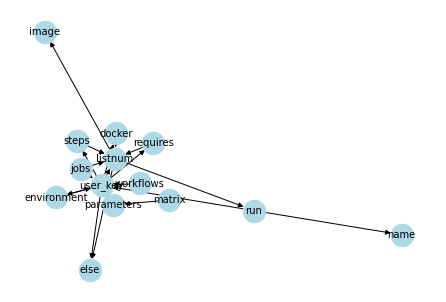

グラフに循環があります。
循環: [('listnum', 'run', 'forward'), ('run', 'user_key', 'forward'), ('user_key', 'docker', 'forward'), ('docker', 'listnum', 'forward')]


In [279]:
import networkx as nx
import matplotlib.pyplot as plt
import glob

filenames =  glob.glob("from_github_file_clear_proper/"+"*")
for filename in filenames[0:1]:
    combined_result = search_next_command(filename)
    #view_graph(combined_result[0],combined_result[1],filename)
    # 与えられたデータをグラフに変換
    data = combined_result[0]

    G = nx.DiGraph()  # 有向グラフを作成
    #print(data)
    # データからノードとエッジを追加
    used_allkey_count = 0
    for keys, items in data.items():
        for item in list(items.values()):
            used_allkey_count += item
    
    for source_node, dependencies in data.items():
        for target_node, target_node_val in dependencies.items():
            if target_node_val/used_allkey_count >= 0.01:
                G.add_edge(source_node, target_node)
            
    # グラフを描画
    pos = nx.spring_layout(G, seed=42)  # グラフのレイアウトを設定
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
    plt.show()
    # 循環を検出
    try:
        cycle = nx.find_cycle(G, orientation='original')
        print("グラフに循環があります。")
        print("循環:", cycle)
    except nx.NetworkXNoCycle:
        print("グラフに循環はありません。")

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import glob

filenames =  glob.glob("from_github_file_clear_proper/"+"*")
for filename in filenames[0:1]:
    combined_result = search_next_command(filename)
    #view_graph(combined_result[0],combined_result[1],filename)
    # 与えられたデータをグラフに変換
    data = combined_result[0]

    G = nx.DiGraph()  # 有向グラフを作成
    #print(data)
    # データからノードとエッジを追加
    used_allkey_count = 0
    for keys, items in data.items():
        for item in list(items.values()):
            used_allkey_count += item
    
    for source_node, dependencies in data.items():
        for target_node, target_node_val in dependencies.items():
            if round((target_node_val/used_allkey_count),2) > 0.01:
                G.add_edge(source_node, target_node)

    # 循環を格納するリスト
    cycles = []

    # 深さ優先探索を使用して循環を探す関数
    def find_cycles(node, visited, stack):
        visited[node] = True
        stack.append(node)

        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                find_cycles(neighbor, visited, stack)
            elif neighbor in stack:
                cycle = stack[stack.index(neighbor):]
                sorted_sublist = sorted(cycle)
                if sorted_sublist not in cycles:
                    cycles.append(sorted_sublist)

        stack.pop()

    # 各ノードを開始ノードとして探索
    for node in G.nodes():
        visited = {}
        stack = []
        find_cycles(node, visited, stack)

    # 循環を表示
    for cycle in cycles:
        print("循環:", cycle)

循環: ['listnum', 'run', 'steps', 'user_key']
循環: ['environment', 'user_key']
循環: ['docker', 'listnum', 'run', 'user_key']
循環: ['listnum', 'run', 'user_key']


In [301]:
data = [[1, 2, 3], [2, 3, 1], [2, 3, 1, 5], [3, 1, 2], [2, 3, 1], [5, 2, 3, 1]]

# 重複を削除して要素を追加する
result = []
for sublist in data:
    if sublist not in result:
        result.append(sublist)

print(result)


[[1, 2, 3], [2, 3, 1], [2, 3, 1, 5], [3, 1, 2], [5, 2, 3, 1]]


In [1]:
import numpy as np
import copy
import itertools
import seaborn as sns
tenki = np.array([0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
print('晴れた日数:{0}日, 曇りの日数:{1}日, 雨の日数:{2}日'.format(np.count_nonzero(tenki==0), np.count_nonzero(tenki==1), np.count_nonzero(tenki==2)))


晴れた日数:20日, 曇りの日数:8日, 雨の日数:2日


In [2]:


def tp(transition_probability):

    data = transition_probability
    zero = np.zeros((np.max(data)+1,np.max(data)+1))

    for i in range(len(data)-1):
        j = copy.deepcopy(i)
        j += 1
        for x, y in itertools.product(range(np.max(data)+1), range(np.max(data)+1)):
            if data[i] == x and data[j] == y:
                zero[x][y] += 1

    row_sum = np.sum(zero, axis=1).reshape((np.max(data)+1,1))
    prob    = zero / row_sum

    return prob
print(tp(tenki))


[[0.65       0.25       0.1       ]
 [0.57142857 0.42857143 0.        ]
 [1.         0.         0.        ]]


<AxesSubplot:>

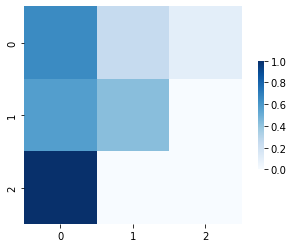

In [3]:
sns.heatmap(tp(tenki), cmap='Blues', vmin=0, vmax=1, center=.5,
            square=True, cbar_kws={"shrink": .5},
            xticklabels = 1, yticklabels = 1)


In [4]:
#import networkx as nx
from graphviz import Digraph

def Graphviz(data, node_label):
    states = np.max(data)+1

    g = Digraph()

    for i in range(states):
        g.node(str(i), label=node_label[i])

    edges = np.array([np.sort(np.array([np.arange(states)]*states).flatten()),
                      np.array([np.arange(states)]*states).flatten()]).T

    edge_labels = np.round(tp(data), 2).flatten().astype('str')

    for i, e in enumerate(edges):
        if edge_labels[i] != '0.0':
            g.edge(str(e[0]), str(e[1]), label=edge_labels[i])

    return g


In [12]:
node_label = ['hare', 'cloud', 'rain','asa']
a = Graphviz(tenki, node_label)
print(a)
a.view()

digraph {
	0 [label=hare]
	1 [label=cloud]
	2 [label=rain]
	0 -> 0 [label=0.65]
	0 -> 1 [label=0.25]
	0 -> 2 [label=0.1]
	1 -> 0 [label=0.57]
	1 -> 1 [label=0.43]
	2 -> 0 [label=1.0]
}



'Digraph.gv.pdf'

In [163]:
#https://graphviz.org/Gallery/directed/fsm.html
import graphviz


f = graphviz.Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='test')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f.view()

'fsm.gv.pdf'

In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from graphviz import Digraph

# formatはpngを指定(他にはPDF, PNG, SVGなどが指定可)
G = Digraph(format='png')
G.attr('node', shape='circle')

N = 15    # ノード数

# ノードの追加
for i in range(N):
    G.node(str(i), str(i))

# 辺の追加
for i in range(N):
    if (i - 1) // 2 >= 0:
        G.edge(str((i - 1) // 2), str(i))

# print()するとdot形式で出力される
print(G)

# binary_tree.pngで保存
G.render('binary_tree')


digraph {
	node [shape=circle]
	0 [label=0]
	1 [label=1]
	2 [label=2]
	3 [label=3]
	4 [label=4]
	5 [label=5]
	6 [label=6]
	7 [label=7]
	8 [label=8]
	9 [label=9]
	10 [label=10]
	11 [label=11]
	12 [label=12]
	13 [label=13]
	14 [label=14]
	0 -> 1
	0 -> 2
	1 -> 3
	1 -> 4
	2 -> 5
	2 -> 6
	3 -> 7
	3 -> 8
	4 -> 9
	4 -> 10
	5 -> 11
	5 -> 12
	6 -> 13
	6 -> 14
}



'binary_tree.png'

In [ ]:
import networkx as nx #networkxのインポート
from matplotlib import pyplot as plt #matplotlibのインポート
G = nx.DiGraph() #無向グラフの場合、有向グラフは->nx.Digraph()

G.add_node(1) #ノードの追加
G.add_node(2)

G.add_nodes_from([3,4]) #リストを使ってノードをまとめて追加することができる

G.nodes(data=False) #出力

G.add_edge(1,2) #エッジの追加
G.add_edges_from([(1,3),(2,4),(1,4),(3,4),(2,1)]) #エッジもまとめて追加することができる

G.edges() #出力

pos = nx.spring_layout(G, seed=0) #ノードの配置を指定

# グラフの描画
plt.figure(figsize=(10,10))
"""
node_size: ノードの大きさを指定(デフォルト:300)
node_color: ノードの色を指定(デフォルト:#1f78b4)
node_shape: ノードの形を指定(デフォルト:'o')
*ノードの形についてはmatplotlib.markersクラスで定義されているマーカー
alpha: ノードの透明度を指定(デフォルト:None)
linewidths: ノードの枠線の太さを指定(デフォルト:1.0)
edgecolors: ノードの枠線の色を指定(デフォルト:node_color)
"""
nx.draw_networkx_nodes(G, pos, node_size=1300, node_color='#87cefa', node_shape='D',
                       alpha=0.7, linewidths=2.0, edgecolors="#0000ff")

"""
width: エッジの太さを指定(デフォルト:1.0)
edge_color: エッジの色を指定(デフォルト:#1f78b4)
style: 線のスタイルを指定(デフォルト:solid line)
alpha: エッジの透明度を指定(デフォルト:None)
arrowstyle: 矢印の形を指定(デフォルト:- or ->)
"""
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='#aaaaaa', style='-.', alpha=0.7, arrowstyle='->') 

"""
font_size: 文字サイズの指定(デフォルト:12)
font_color: エッジの色を指定(デフォルト:k)
font_family: 文字フォントの指定(デフォルト:sans-serif)
font_weight: 文字の修飾(デフォルト:normal)
"""
nx.draw_networkx_labels(G, pos, font_size=20, font_color='#0000ff', 
                     font_family='sans-serif', font_weight='bold', alpha=None)

plt.show()



In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



W = np.array([[0, 1, 1], [1, 0, 1], [1, 2, 0]])
G = nx.from_numpy_array(W, create_using=nx.DiGraph)


nx.set_edge_attributes(G, name='weight', values=1)
G.edges[1, 0]['weight'] = 3
G.edges[2, 1]['weight'] = 3
G.edges[0, 2]['weight'] = 1

nx.draw_networkx(G, arrows=True, width=[v['weight'] for v in G.edges.values()], connectionstyle="arc3, rad=0.2")
plt.show()
plt.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph # pip install netgraph

triangle = nx.DiGraph([('a', 'b'), ('a', 'c'), ('b', 'a'), ('c', 'b'), ('c', 'c')])

node_positions = {
    'a' : np.array([0.2, 0.2]),
    'b' : np.array([0.8, 0.2]),
    'c' : np.array([0.5, 0.8]),
}

edge_labels = {
    ('a', 'b') : 3,
    ('a', 'c') : 'Lorem ipsum',
    ('b', 'a') : 4,
    ('c', 'b') : 'dolor sit',
    ('c', 'c') : r'$\pi$'
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,14))

Graph(triangle, node_labels=True, edge_labels=edge_labels,
      edge_label_fontdict=dict(size=12, fontweight='bold'),
      node_layout=node_positions, edge_layout='straight',
      node_size=6, edge_width=4, arrows=True, ax=ax1)

Graph(triangle, node_labels=True, edge_labels=edge_labels,
      edge_label_fontdict=dict(size=12, fontweight='bold'),
      node_layout=node_positions, edge_layout='curved',
      node_size=6, edge_width=4, arrows=True, ax=ax2)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("b", "a", weight=0.9)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()